In [142]:
# import library and load dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
import os


In [143]:
# load dataset
data_path = '../data/processed/data_cleaned_scaled_onehot.csv' 
data = pd.read_csv(data_path)

# form features and target
X = data.drop(['Target'], axis=1)
y = data['Target']

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<span style="font-family: Arial; font-size: 20px;">1. K-Means </span>

k=2, score=0.22367966968985398
k=3, score=0.2473461011294509
k=4, score=0.08664530440691477
k=5, score=0.08562650004035768
k=6, score=0.09145191633101156
k=7, score=0.10061075793027464
k=8, score=0.10392171343001419
k=9, score=0.10190873189852692
k=10, score=0.09827755706488601


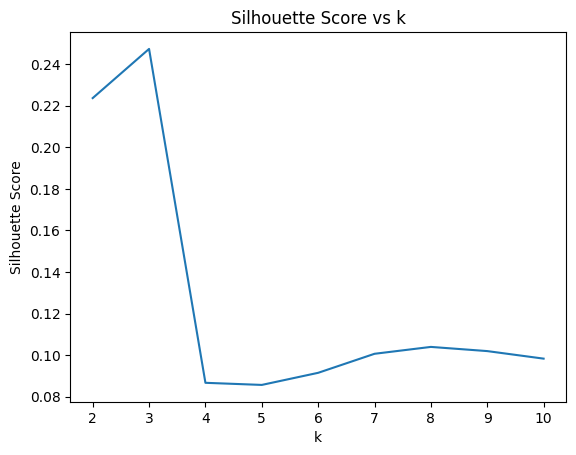

In [144]:
# search for the best k value for KMeans clustering
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    print(f'k={k}, score={score}')
    scores.append(score)

#plot the scores

plt.plot(np.arange(2, 11), scores)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.savefig(os.path.join(os.path.dirname('../results/'), 'clustering_silhouette_kmeans.png'))
plt.show()

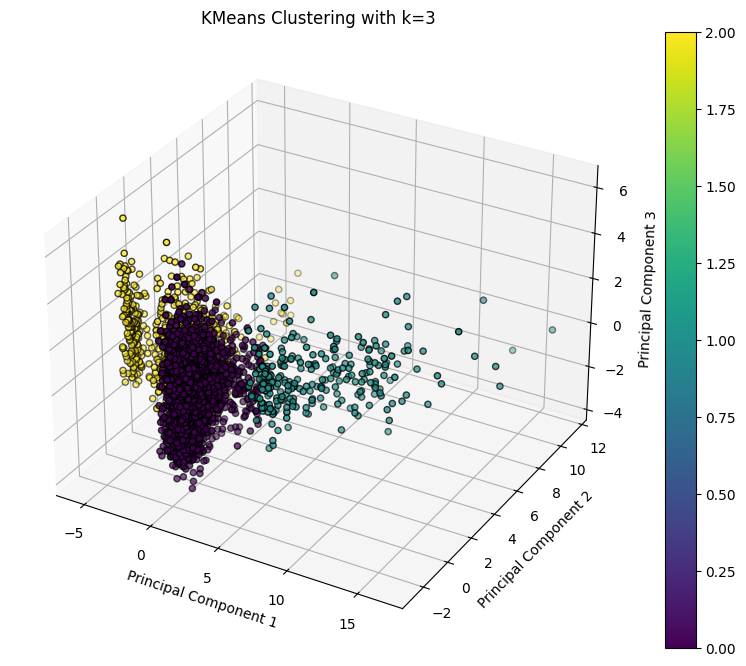

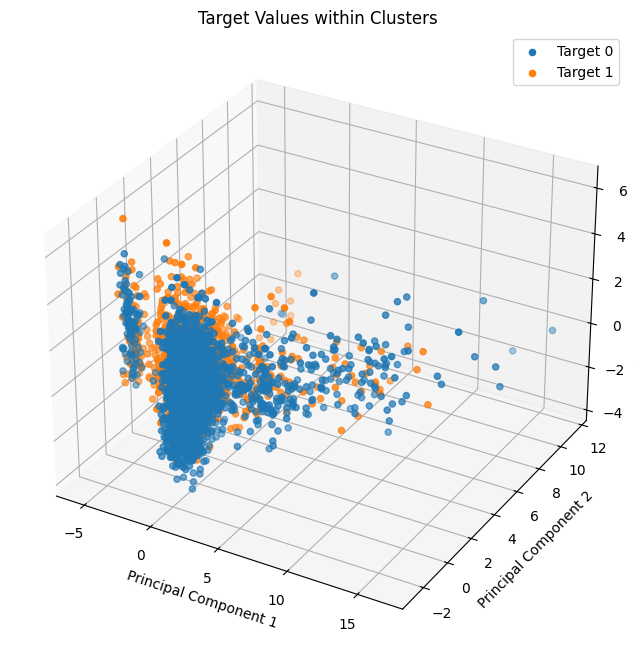

In [145]:
# draw the scatter plot of the data

pca = PCA(n_components=3)
X_scatter = pca.fit_transform(X)

best_k = scores.index(max(scores)) + 2

kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_scatter)

# 2D plot for KMeans clusters
# plt.scatter(X_scatter[:, 0], X_scatter[:, 1], c=kmeans.labels_)
# plt.title(f"KMeans Clustering with k={best_k}")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.show()

# # visualize y values with different colors based on cluster
# for i in sorted(y.unique()):
#     plt.scatter(X_scatter[y == i, 0], X_scatter[y == i, 1], label=f'Target {i}')
# plt.title('Target Values within Clusters')
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.legend()
# plt.show()

# 3D plot for KMeans clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scatter[:, 0], X_scatter[:, 1], X_scatter[:, 2], 
                     c=kmeans.labels_, cmap='viridis', edgecolor='k')
ax.set_title(f"KMeans Clustering with k={best_k}")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.colorbar(scatter)
plt.savefig(os.path.join(os.path.dirname('../results/'), 'clustering_3d_kmeans.png'))
plt.show()

# 3D plot for Target Classes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in sorted(y.unique()):
    ax.scatter(X_scatter[y == i, 0], X_scatter[y == i, 1], X_scatter[y == i, 2], label=f'Target {i}')
ax.set_title('Target Values within Clusters')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()
plt.savefig(os.path.join(os.path.dirname('../results/'), 'clustering_3d_target_kmeans.png'))
plt.show()


<span style="font-family: Arial; font-size: 20px;">2. Hierarchical Clustering </span>

k=2, score=0.20258783444352477
k=3, score=0.21919703450421268
k=4, score=0.22677731795102601
k=5, score=0.10368179780371908
k=6, score=0.10511020261953896
k=7, score=0.10671466236247494
k=8, score=0.07481943183045814
k=9, score=0.07774559730659064
k=10, score=0.08042449244925022


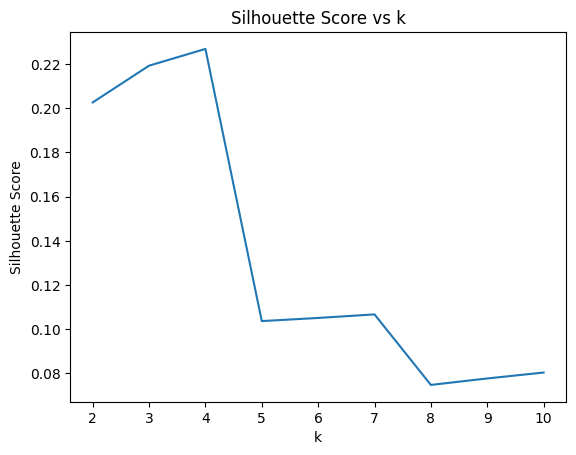

In [146]:
# use Hierarchical Clustering
scores = []
for k in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit(X_train)
    score = silhouette_score(X_train, agg.labels_)
    print(f'k={k}, score={score}')
    scores.append(score)

#plot the scores
plt.plot(np.arange(2, 11), scores)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.savefig(os.path.join(os.path.dirname('../results/'), 'clustering_silhouette_hiera.png'))
plt.show()

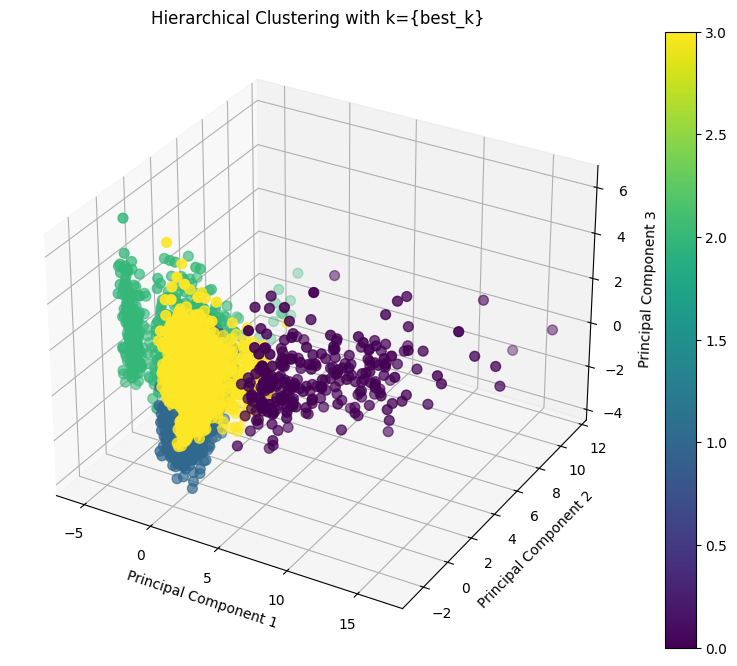

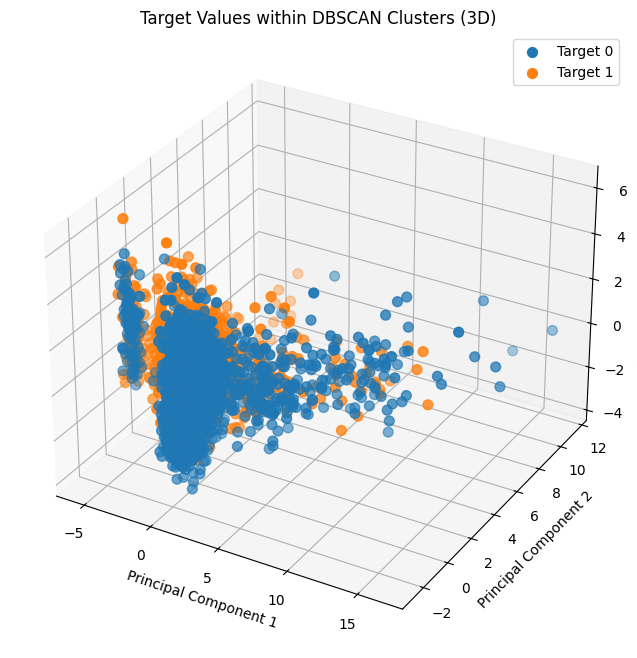

In [147]:
# draw the scatter plot of the data

best_k = scores.index(max(scores)) + 2

agg = AgglomerativeClustering(n_clusters=best_k)
agg.fit(X_scatter)

# plt.scatter(X_scatter[:, 0], X_scatter[:, 1], c=agg.labels_)
# plt.title(f"Hierarchical Clustering with k={best_k}")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.savefig(os.path.join(os.path.dirname('../results/'), 'clustering_3d_hiera.png'))
# plt.show()

# 3D plot of the data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scatter[:, 0], X_scatter[:, 1], X_scatter[:, 2], c=agg.labels_, cmap='viridis', s=50)
ax.set_title("Hierarchical Clustering with k={best_k}")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.colorbar(scatter)
plt.savefig(os.path.join(os.path.dirname('../results/'), 'clustering_3d_hiera.png'))
plt.show()


# visualize y values with different colors based on cluster

# for i in sorted(y.unique()):
#     plt.scatter(X_scatter[y == i, 0], X_scatter[y == i, 1], label=f'Target {i}')
# plt.title('Target Values within Clusters')
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.legend()
# plt.savefig(os.path.join(os.path.dirname('../results/'), 'clustering_2d_target_hiera.png'))
# plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in sorted(y.unique()):
    ax.scatter(X_scatter[y == i, 0], X_scatter[y == i, 1], X_scatter[y == i, 2], label=f'Target {i}', s=50)
ax.set_title("Target Values within DBSCAN Clusters (3D)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()
plt.savefig(os.path.join(os.path.dirname('../results/'), 'clustering_3d_target_dbscan.png'))
plt.show()


<span style="font-family: Arial; font-size: 20px;">3. DBSCAN </span>

/var/folders/f3/57ck941n55v4kqtbr7g1rrp40000gn/T/ipykernel_32496/749304697.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


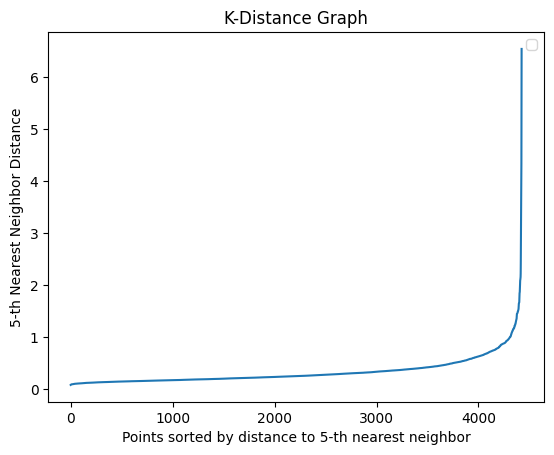

In [148]:
# Import libraries
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Method to find the best eps value using a k-distance graph
def find_best_eps(X, n_neighbors=5):
    """
    Finds the optimal eps value for DBSCAN using the k-distance graph.
    
    Args:
    - X: Input data (numpy array or dataframe)
    - n_neighbors: Number of neighbors to consider (min_samples in DBSCAN)
    
    Returns:
    - Optimal eps value
    """
    nearest_neighbors = NearestNeighbors(n_neighbors=n_neighbors)
    neighbors = nearest_neighbors.fit(X)
    distances, indices = neighbors.kneighbors(X)
    
    # Sort the distances for the k-th nearest neighbor
    distances = np.sort(distances[:, -1])  # Last column is the k-th distance
    
    # Plot the k-distance graph
    plt.plot(distances)
    # plt.axvline(x=elbow_index, color="red", linestyle="--", label=f"Elbow Point (eps = {distances[elbow_index]:.2f})")
    plt.title("K-Distance Graph")
    plt.xlabel("Points sorted by distance to {}-th nearest neighbor".format(n_neighbors))
    plt.ylabel("{}-th Nearest Neighbor Distance".format(n_neighbors))
    plt.legend()
    plt.savefig(os.path.join(os.path.dirname('../results/'), 'clustering_kdis_dbscan.png'))
    plt.show()
    


# Find the best eps value
best_eps = find_best_eps(X_scatter, n_neighbors=5)


From the graph, we can see that the elbow point is close to 0.9.

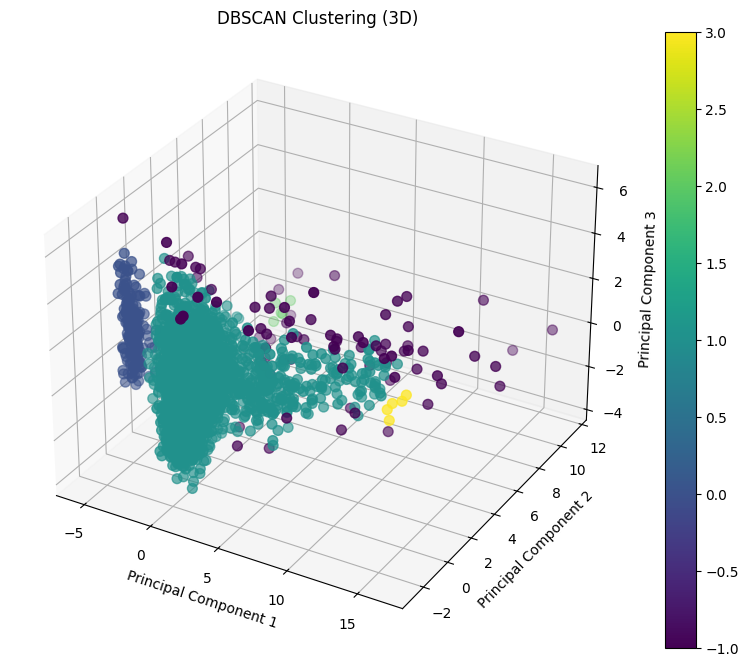

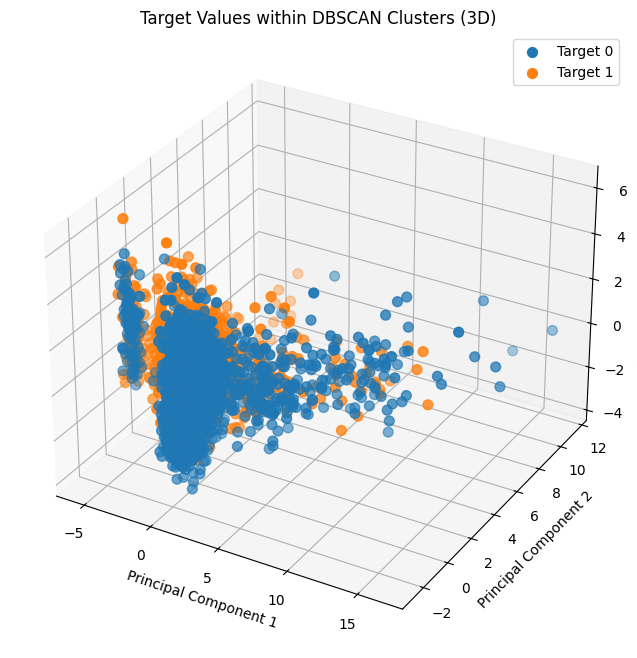

In [149]:
# Import DBSCAN
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=5)
dbscan.fit(X_scatter)

# 3D plot of the data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scatter[:, 0], X_scatter[:, 1], X_scatter[:, 2], c=dbscan.labels_, cmap='viridis', s=50)
ax.set_title("DBSCAN Clustering (3D)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.colorbar(scatter)
plt.savefig(os.path.join(os.path.dirname('../results/'), 'clustering_3d_dbscan.png'))
plt.show()


# Visualize y values with different colors based on cluster
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in sorted(y.unique()):
    ax.scatter(X_scatter[y == i, 0], X_scatter[y == i, 1], X_scatter[y == i, 2], label=f'Target {i}', s=50)
ax.set_title("Target Values within DBSCAN Clusters (3D)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()
plt.savefig(os.path.join(os.path.dirname('../results/'), 'clustering_3d_target_dbscan.png'))
plt.show()

Clustering Visualizations:
- The 2D/3D scatter plots for both KMeans and Hierarchical Clustering demonstrate that the clusters identified do not align well with the target classes (e.g., dropout, not droupout).
- When visualizing the target classes within the same 2D/3D space (using PCA-reduced components), there’s significant overlap between different target groups, indicating that the clusters are not distinctly aligned with the target categories.

Effectiveness of Clustering for Classification:
- The conclusion notes that clustering does not effectively separate the target classes. This suggests that the features in X may not have enough distinct separation to allow clustering algorithms to capture the target classes accurately.
- This lack of separation may imply that other techniques, such as supervised learning algorithms (e.g., logistic regression, decision trees, or support vector machines), may be more suitable for this dataset given the goal is to predict the target classes based on the features.